<a href="https://colab.research.google.com/github/fisicorj/astrofisica/blob/main/Corpo_negro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

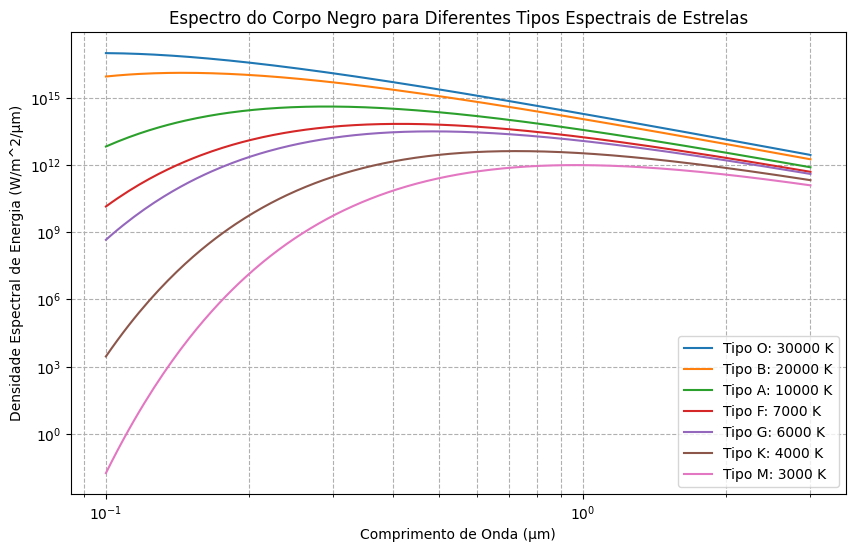

Tipo Espectral O: Comprimento de Onda do Pico = 0.10 μm, Porcentagem de Emissão no Óptico = 4.59%, Descrição: Azul
Tipo Espectral B: Comprimento de Onda do Pico = 0.14 μm, Porcentagem de Emissão no Óptico = 11.49%, Descrição: Azulada, Rigel (B8)
Tipo Espectral A: Comprimento de Onda do Pico = 0.29 μm, Porcentagem de Emissão no Óptico = 34.57%, Descrição: Branca, Sirius (A1)
Tipo Espectral F: Comprimento de Onda do Pico = 0.41 μm, Porcentagem de Emissão no Óptico = 40.90%, Descrição: Amarelada, Canopus (F0)
Tipo Espectral G: Comprimento de Onda do Pico = 0.48 μm, Porcentagem de Emissão no Óptico = 38.82%, Descrição: Amarela, Sol (G2), Alfa Cen (G2)
Tipo Espectral K: Comprimento de Onda do Pico = 0.72 μm, Porcentagem de Emissão no Óptico = 21.16%, Descrição: Laranja, Arcturus (K2), Aldebaran (K5)
Tipo Espectral M: Comprimento de Onda do Pico = 0.97 μm, Porcentagem de Emissão no Óptico = 8.18%, Descrição: Vermelha, Betelgeuse (M2)


In [2]:
import numpy as np
import scipy.constants as const
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Dicionário de tipos espectrais com suas temperaturas e descrições
spectral_types = {
    'O': (30000, 'Azul'),
    'B': (20000, 'Azulada, Rigel (B8)'),
    'A': (10000, 'Branca, Sirius (A1)'),
    'F': (7000, 'Amarelada, Canopus (F0)'),
    'G': (6000, 'Amarela, Sol (G2), Alfa Cen (G2)'),
    'K': (4000, 'Laranja, Arcturus (K2), Aldebaran (K5)'),
    'M': (3000, 'Vermelha, Betelgeuse (M2)')
}

def planck(wavelength, temperature):
    """
    Calcula a densidade espectral de energia do corpo negro de acordo com a Lei de Planck.

    Args:
        wavelength (float): Comprimento de onda (em metros).
        temperature (float): Temperatura da estrela (em Kelvin).

    Returns:
        float: Densidade espectral de energia (em W/m^2/m).
    """
    x = const.h * const.c / (wavelength * const.k * temperature)
    # Para evitar overflow na função exponencial
    with np.errstate(over='ignore'):
        exp_term = np.exp(np.clip(x, None, 700))  # Limitar o valor máximo de x para evitar overflow
    intensity = 2 * const.h * const.c**2 / wavelength**5 / (exp_term - 1)
    return intensity

def peak_wavelength(temperature):
    """
    Calcula o comprimento de onda do pico do espectro para uma dada temperatura.

    Args:
        temperature (float): Temperatura da estrela (em Kelvin).

    Returns:
        float: Comprimento de onda do pico (em metros).
    """
    return 2.8977729e-3 / temperature

def optical_emission_percentage(temperature):
    """
    Calcula a porcentagem da emissão no óptico para uma dada temperatura.

    Args:
        temperature (float): Temperatura da estrela (em Kelvin).

    Returns:
        float: Porcentagem da emissão no óptico.
    """
    lower_limit = 0.39e-6  # 390 nm em micrômetros
    upper_limit = 0.70e-6  # 700 nm em micrômetros

    optical_emission = integrate.quad(lambda x: planck(x, temperature), lower_limit, upper_limit)[0]
    total_emission = integrate.quad(lambda x: planck(x, temperature), 0, 10e-6)[0]

    return (optical_emission / total_emission) * 100

# Gráfico do espectro do corpo negro para diferentes tipos espectrais de estrelas
wavelengths = np.linspace(0.1e-6, 3e-6, 1000)  # Intervalo de comprimentos de onda para o gráfico

plt.figure(figsize=(10, 6))

for spectral_type, (temperature, description) in spectral_types.items():
    plt.plot(wavelengths * 1e6, planck(wavelengths, temperature), label=f'Tipo {spectral_type}: {temperature} K')

plt.xlabel('Comprimento de Onda (μm)')
plt.ylabel('Densidade Espectral de Energia (W/m^2/μm)')
plt.title('Espectro do Corpo Negro para Diferentes Tipos Espectrais de Estrelas')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

# Determinação do comprimento de onda do pico do espectro e da porcentagem de emissão no óptico
for spectral_type, (temperature, description) in spectral_types.items():
    peak = peak_wavelength(temperature)
    percentage_optical = optical_emission_percentage(temperature)
    print(f'Tipo Espectral {spectral_type}: Comprimento de Onda do Pico = {peak * 1e6:.2f} μm, '
          f'Porcentagem de Emissão no Óptico = {percentage_optical:.2f}%, '
          f'Descrição: {description}')


